https://github.com/pytorch/examples/tree/master/mnist

# PyTorch Data Preprocess

In [1]:
import torch

from torchvision import datasets, transforms

### Data Loader 부르기

파이토치는 DataLoader를 불러 model에 넣음

In [2]:
batch_size = 32
test_batch_size = 32

In [3]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset/', train=True, download=True,
                  transform=transforms.Compose([
                      transforms.ToTensor(),
                      transforms.Normalize(mean=(0.5,),std=(0.5,))
                  ])),
batch_size=batch_size,
shuffle=True)

100.1%

Extracting dataset/MNIST/raw/train-images-idx3-ubyte.gz to dataset/MNIST/raw


113.5%

Extracting dataset/MNIST/raw/train-labels-idx1-ubyte.gz to dataset/MNIST/raw


100.4%

Extracting dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to dataset/MNIST/raw


180.4%

Extracting dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/MNIST/raw
Processing...
Done!


../torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [6]:
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset', train=False,
                  transform=transforms.Compose([
                      transforms.ToTensor(),
                      transforms.Normalize((0.5,),(0.5))
                  ])),
batch_size=batch_size,
shuffle=True)

### 첫번재 iteration에서 나오는 데이터 확인

In [8]:
images, labels = next(iter(train_loader))

In [9]:
images.shape

torch.Size([32, 1, 28, 28])

In [10]:
labels.shape

torch.Size([32])

PyTorch는 TensorFlow와 다르게 [Batch Size, Channel, Height, Width] 임을 명시해야함

### 데이터 시각화

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

In [13]:
image = torch_image.numpy()
image.shape

(28, 28)

In [14]:
label = labels[0].numpy()
label.shape

()

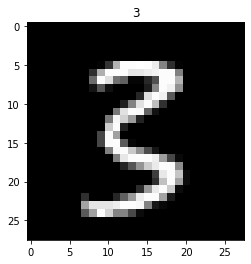

In [15]:
plt.title(label)
plt.imshow(image, 'gray')
plt.show()